# Homework 5: Exploratory Data Analysis & Insight Discovery

This is a **pair-optional** assignment. Total: 20 points. Due:**<span style="color:red">  Sunday, October 5th, 11:59 pm </span>**. Please upload your Jupyter Notebook together with your chosen dataset, targeting roughly the same scope as the prior assignments: ~20 tasks.

**Objective**: Select a dataset, formulate a pertinent analytical question, and embark on a journey of data exploration to observe if the dataset holds answers to your question.

**Background**: Effective data analytics involves a blend of questioning, exploring, and experimenting. Your task is to embody these practices, seeking not necessarily to find clear-cut answers, but to immerse yourself in the iterative process of data analysis.

**Task Details**:

**`Dataset Selection`**:

Select a dataset from Kaggle or another source that captures your interest. It may be related to finance, healthcare, social sciences, or any other domain.
Ensure the dataset is rich enough to offer ample exploratory opportunities.

**`Formulate a Question`**:

Propose a relevant, challenging analytical question related to your chosen dataset.
This question should be exploratory in nature, e.g., “What factors influence the sale price of houses in a particular region?”

**`Data Exploration and Analysis Pipeline`**:

Engage in exploratory data analysis (EDA) and attempt to explore relationships, patterns, and anomalies in the data.
Utilize visualizations effectively to understand and communicate your findings.

**Guideline Steps**:

**`Data Preprocessing`**:
Handle missing values, outliers, and ensure data is of the correct type.

**`Exploratory Data Analysis (EDA)`**:
Utilize summary statistics and visualizations to understand data characteristics and relationships.

**`Analysis`**:
Based on your EDA, perform deeper analyses to explore your question.

**`Documentation and Reporting`**:
Clearly document your workflow, including code, visualizations, observations, and interim conclusions.
Mention clearly any assumptions and limitations encountered during your analysis.

**`Reflection`**:

Provide a reflection on your findings and the challenges encountered.
Mention any alternative approaches or additional analyses that could be undertaken in the future.

**`Assessment Criteria`**:

Your grade will not be based on whether you answer your question conclusively. Rather, the assessment will focus on:

* The robustness and relevance of your analytical question.
* The comprehensiveness and systematic approach of your data exploration and analysis.
* Your ability to articulate your findings, challenges, and learning through documentation and reflection.

**`Encouragement Note`**:

Remember, the objective is to learn and explore. Do not shy away from challenges and unknown territories. If a certain stage in the task demands new knowledge, take a pause and learn it. This is a safe space to try, fail, learn, and repeat. Your enthusiasm to navigate through challenges and your capacity to adapt and learn new things in the process will be celebrated.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 7917 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   type          7917 non-null   int64   
 1   title        

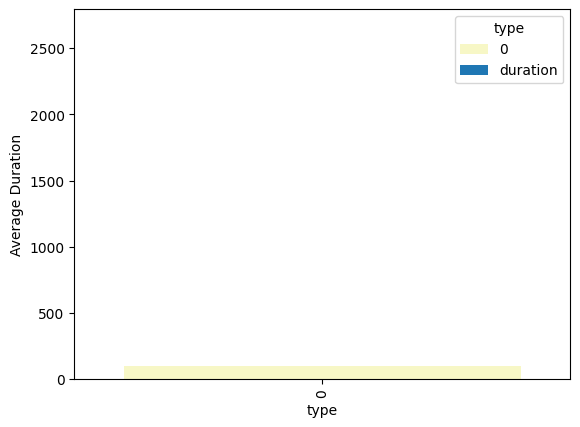

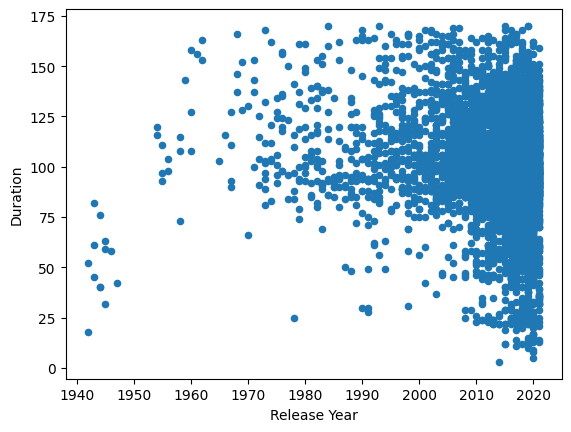

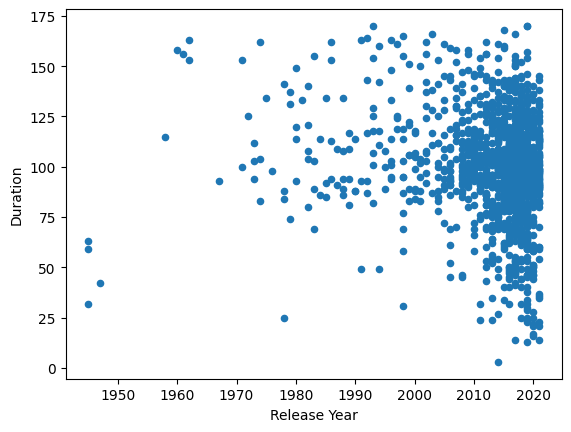

Mean Absolute Error: 16.251220291193086
Predicted duration for the sample: 105.44374740416463


np.float64(90.0)

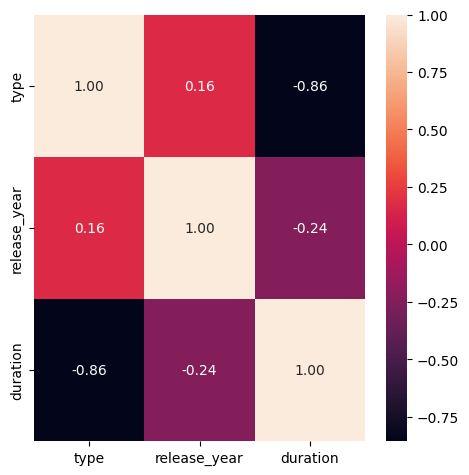

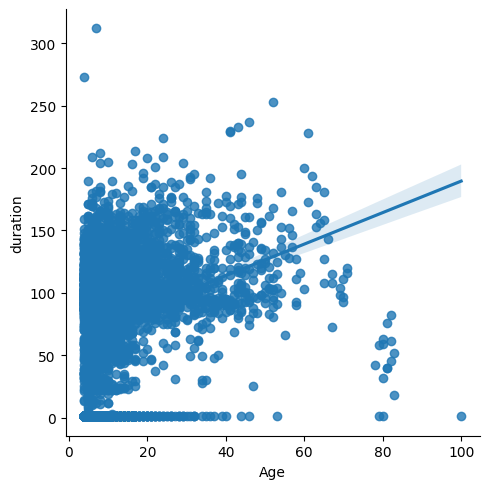

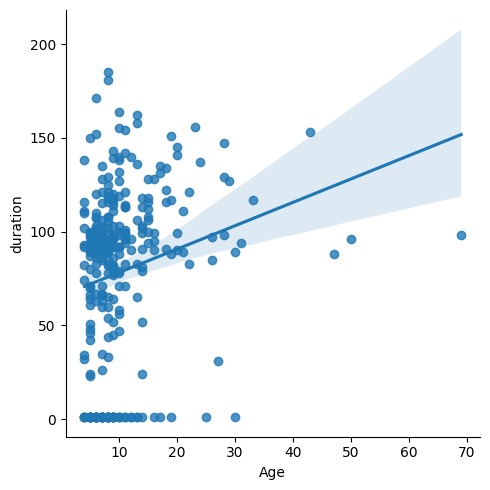

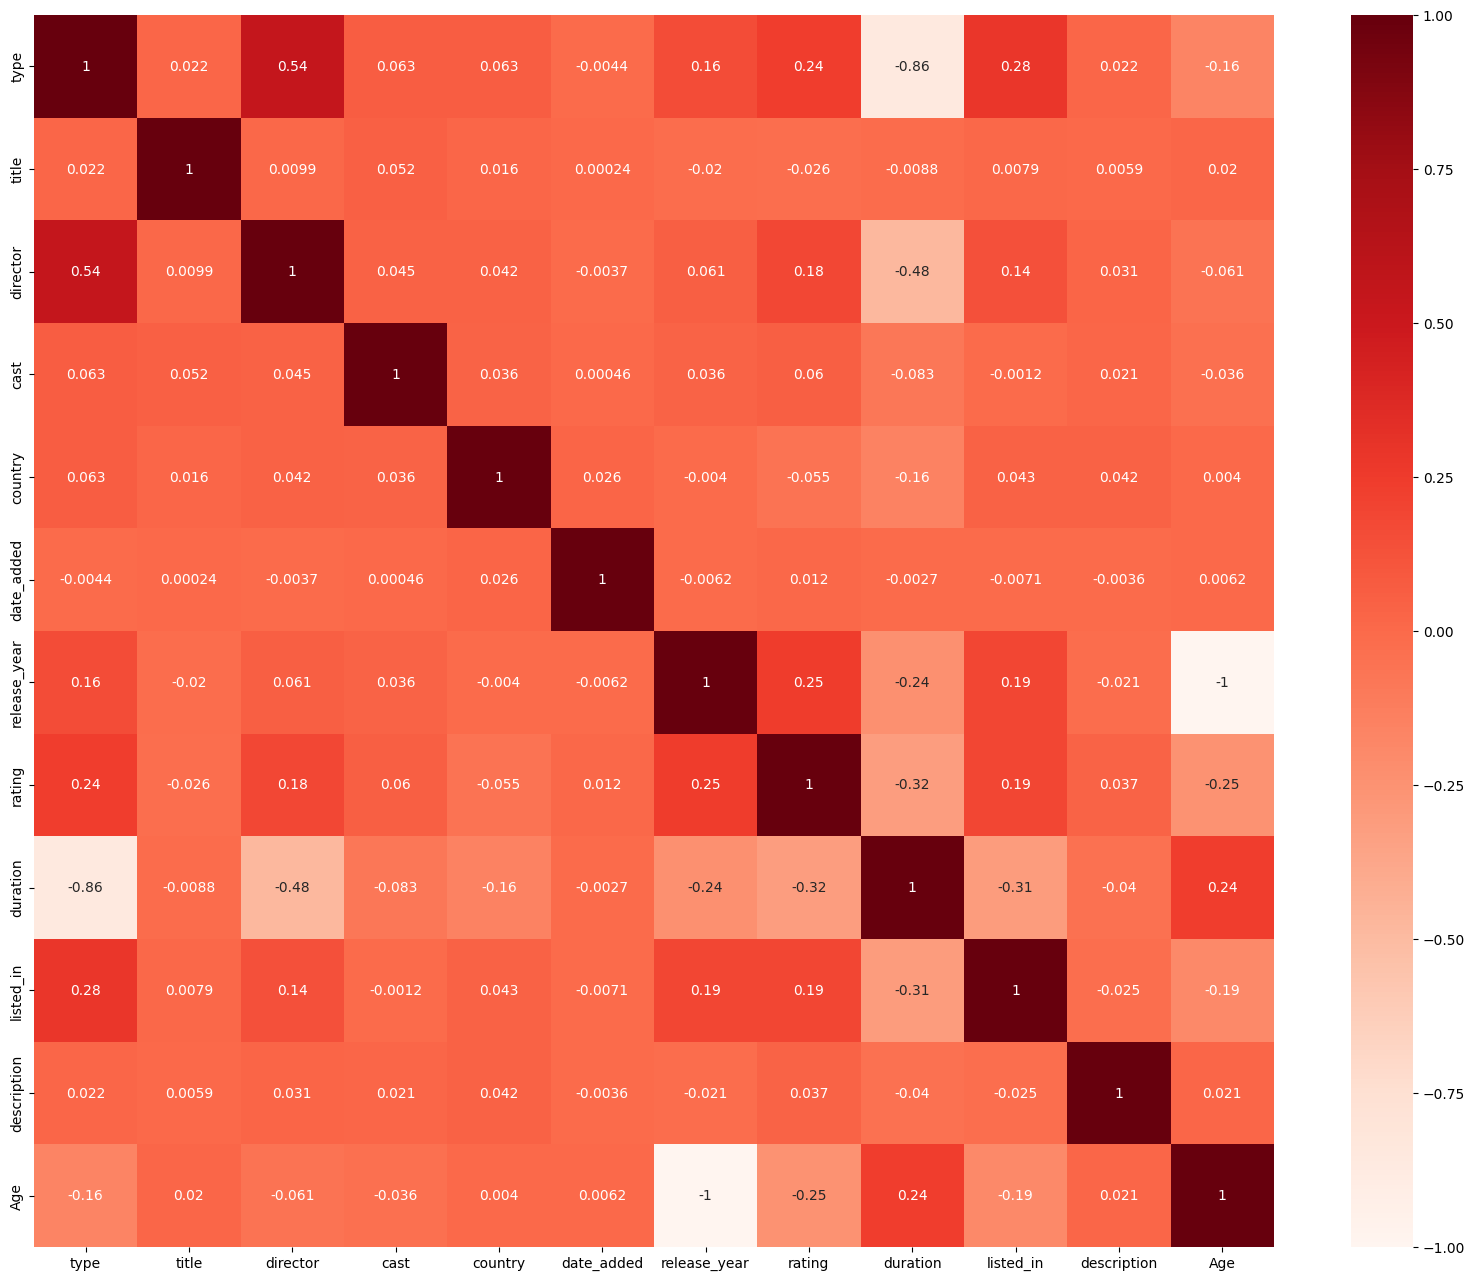

In [ ]:
# Analytical Question:
# How does the age of a Netflix title (time since release) influence its duration, and are there observable patterns between content type, release year, and duration?

# Objective
# Explore Netflix dataset to understand trends and relationships between content type, duration, and rating, and build a simple model to predict duration.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

url = 'https://huggingface.co/datasets/hugginglearners/netflix-shows/resolve/main/netflix_titles.csv'
netflix = pd.read_csv(url)

netflix.head()
netflix.info()
netflix.describe()
netflix.shape
netflix['type'].unique()
netflix['rating'].unique()

netflix['duration'] = netflix['duration'].str.replace(' min', '', regex=False)
netflix['duration'] = netflix['duration'].str.replace(' Season', '', regex=False)
netflix['duration'] = pd.to_numeric(netflix['duration'], errors='coerce')
netflix.dropna(subset=['duration','rating'], inplace=True)
netflix = netflix.drop('show_id', axis=1)
netflix.drop_duplicates(inplace=True)

encoder = LabelEncoder()
netflix['type'] = encoder.fit_transform(netflix['type'])

for col in netflix.select_dtypes(include='object').columns:
    netflix[col] = netflix[col].astype('category')

netflix.info()
netflix['duration'].hist()
q_low = netflix['duration'].quantile(0.01)
q_high = netflix['duration'].quantile(0.99)
netflix_filtered = netflix[(netflix['duration'] > q_low) & (netflix['duration'] < q_high)]

ax = netflix_filtered['duration'].hist()
ax.set_xlabel("Duration")
ax.set_ylabel("Frequency")

netflix_filtered.groupby(by='type', observed=False)['duration'].agg('mean').plot(kind='bar', ylabel='Average Duration')
sns.barplot(x='type', y='duration', data=netflix_filtered, palette='Spectral', hue='type')

netflix_filtered.plot(x='release_year', y='duration', kind='scatter')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.show()

netflix_filtered.sample(1500).plot(x='release_year', y='duration', kind='scatter')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.show()

sns.lmplot(data=netflix_filtered.sample(1500), x='release_year', y='duration')
numeric_columns = netflix.select_dtypes(include='number').columns
sns.heatmap(netflix[numeric_columns].corr(), annot=True, fmt='.2f')

netflix['Age'] = 2025 - netflix['release_year']
sns.lmplot(data=netflix, x='Age', y='duration')
netflix_filtered = netflix.drop(netflix[netflix['duration']>200].index)
sns.lmplot(data=netflix_filtered.sample(300), x='Age', y='duration')

encoder = LabelEncoder()
for col in netflix.select_dtypes(include='category'):
    netflix[col] = encoder.fit_transform(netflix[col])

plt.figure(figsize=(20,16))
sns.heatmap(netflix.corr(), annot=True, cmap="Reds")

features = ['type', 'Age']
X = netflix[features].values
y = netflix['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

test_sample = [X_test[0]]
predicted_duration = model.predict(test_sample)
print(f"Predicted duration for the sample: {predicted_duration[0]}")
y_test[0]


#I chose the Netflix Titles dataset from Hugging Face.This dataset contains information about all
# movies and TV shows available on Netflix, including columns such as title, type (Movie/TV Show), release_year,
# duration, rating, listed_in (genres), and country.

#Data Preprocessing
#Removed missing values from duration and rating.
#Converted duration from strings to numeric values.
#Dropped duplicates

#Exploratory Data Analysis (EDA)
#Plotted histograms 
#Scatter plots of Age vs duration were used to observe patterns.
#Boxplots and bar plots for type vs duration highlighted differences between Movies and TV Shows.
#Heatmaps showed correlations

#Analysis

#From the scatter plot, most titles cluster around short durations.

#Younger titles have slightly shorter durations on average, possibly due to the trend of shorter attention spans

#Older content shows more variation in duration, including some extreme outliers